# Ideas & Stuff that needs to be done:
- Good data splits
- Feature Importance
- Comparison of uncomplicated vs. complicated
- Do result visualization (e.g. ROC/AUC)
- Feature Selection comparison
- Include recommendations based on predictions

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [111]:
features = pd.read_csv('all_uti_features.csv', index_col = 'example_id')
prescrip = pd.read_csv('all_prescriptions.csv', index_col = 'example_id')
resistance = pd.read_csv('all_uti_resist_labels.csv', index_col = 'example_id')

### For us, resistance to SXT and CIP is the target variable to predict!

In [272]:
cip_df = resistance[['CIP']].join(features)

## Divide into train & test data

- Don't touch the test data afterwards!
- Avoid having the same person in train & test data -> data leakage 

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('selected micro - ', regex=True, na=True)], axis = 1)

In [277]:
cip_df.drop('is_train', axis = 1, inplace = True)
cip_df.drop('uncomplicated', axis = 1, inplace = True)

In [278]:
cip_y = cip_df[['CIP']]
cip_X = cip_df.drop('CIP', axis = 1)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(cip_X, cip_y, train_size = 0.7)

In [280]:
X_train['CIP'] = y_train['CIP']
X_test['CIP'] = y_test['CIP']

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [281]:
X_train.dropna(inplace = True)
X_test.dropna(inplace = True)

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [286]:
y_train = X_train['CIP']
X_train = X_train.drop('CIP', axis = 1)
y_test = X_test['CIP']
X_test = X_test.drop('CIP', axis = 1)

## Feature Reduction

#### Eliminate sparse binary features

In [287]:
for feature in X_train.columns:
    if X_train[feature].unique().shape[0] == 2: # Check if variable is binary
        if (X_train[feature].sum() / X_train.shape[0]) <= 0.001: # Check if positive patients are sparse
            print(X_train[[feature]].sum())
            X_train.drop(feature, axis = 1, inplace = True)
            X_test.drop(feature, axis = 1, inplace = True)

micro - prev resistance SAM 14    73.0
dtype: float64
micro - prev resistance CTT 90    59.0
dtype: float64
ab class 7 - ansamycin    27.0
dtype: float64
medication 7 - ceftazidime    30.0
dtype: float64
medication 7 - tetracycline    14.0
dtype: float64
medication 7 - dicloxacillin    29.0
dtype: float64
medication 7 - cefuroxime    22.0
dtype: float64
medication 7 - minocycline    18.0
dtype: float64
medication 7 - rifampin    27.0
dtype: float64
medication 7 - clarithromycin    41.0
dtype: float64
medication 7 - nafcillin    57.0
dtype: float64
medication 7 - erythromycin    67.0
dtype: float64
medication 7 - cefadroxil    13.0
dtype: float64
ab class 14 - ansamycin    56.0
dtype: float64
medication 14 - tetracycline    30.0
dtype: float64
medication 14 - dicloxacillin    50.0
dtype: float64
medication 14 - clarithromycin    76.0
dtype: float64
medication 14 - moxifloxacin    59.0
dtype: float64
medication 14 - cefuroxime    61.0
dtype: float64
medication 14 - minocycline    31.0
dt

In [288]:
X_train.columns

Index(['demographics - age', 'demographics - is_white',
       'demographics - is_veteran', 'micro - prev resistance LVX 14',
       'micro - prev resistance AMP 14', 'micro - prev resistance CFZ 14',
       'micro - prev resistance NIT 14', 'micro - prev resistance GEN 14',
       'micro - prev resistance SXT 14', 'micro - prev resistance TET 14',
       ...
       'custom 30 - nursing home', 'custom 90 - nursing home',
       'infection_sites - RESPIRATORY_TRACT', 'infection_sites - BLOOD',
       'infection_sites - SKIN_SOFTTISSUE',
       'infection_sites - ABSCESS_OR_FLUID_NOS', 'hosp ward - ER',
       'hosp ward - ICU', 'hosp ward - IP', 'hosp ward - OP'],
      dtype='object', length=680)

## Feature Selection

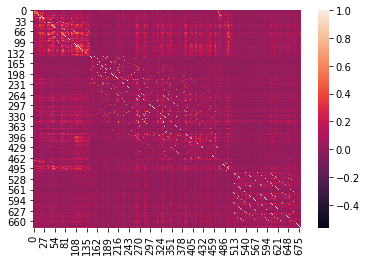

In [289]:
sns.heatmap(np.corrcoef(X_train.join(y_train), rowvar = False))

In [290]:
np.corrcoef(X_train.join(y_train), rowvar = False)[X_train.shape[1]]

array([ 2.05535335e-01,  1.79816038e-02,  8.66267813e-02,  1.01192772e-01,
        7.63656216e-02,  5.83741420e-02,  5.94563789e-02,  4.96773404e-02,
        5.97409461e-02,  6.70273794e-02,  4.54192750e-02,  9.24542622e-02,
        1.22496190e-01,  8.32431599e-02,  5.32587420e-02,  5.04305035e-02,
        1.68513995e-01,  1.33855595e-01,  9.83533810e-02,  2.32119137e-01,
        6.59426846e-02,  4.43363023e-02,  1.26660254e-01,  1.51824077e-01,
        2.30682991e-01,  1.29358183e-01,  1.26660525e-01,  1.41661652e-01,
        1.14196875e-01,  1.14576298e-01,  6.17540708e-02,  7.16370425e-02,
        8.05277687e-02,  8.69868941e-02,  3.30110123e-02,  6.54673010e-02,
        4.59181815e-02,  1.69983851e-01,  2.47233370e-01,  1.75676897e-01,
        1.08714176e-01,  3.51196103e-01,  1.95663883e-01,  5.86900660e-02,
        9.93998104e-02,  2.25682818e-01,  2.22262413e-01,  1.92668327e-01,
        3.52216541e-01,  1.89057960e-01,  1.41958593e-01,  1.59682329e-01,
        1.89392149e-01,  

In [233]:
from sklearn.decomposition import PCA

In [234]:
reduced = PCA(n_components = 0.9).fit_transform(X = cip_df.drop('CIP', axis = 1))

KeyError: "['CIP'] not found in axis"

In [ ]:
pd.DataFrame(reduced, index = cip_df.index)

## Construct "Blackbox" Models

Models to test & tune: 
- XGBoost
- Neural Net
- Random Forest
- Ensembles of all of them

In [291]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [292]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [293]:
xgb_mod = xgb.XGBClassifier(objective = 'binary:logistic')

In [294]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search_first = RandomizedSearchCV(xgb_mod, param_distributions=params, scoring = 'roc_auc', random_state=42, n_iter=5, cv=3, verbose=1, n_jobs=7, return_train_score=True)

search_first.fit(X_train, y_train)

report_best_scores(search_first.cv_results_, 1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  15 out of  15 | elapsed:  6.1min finished
C:\Users\benne\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model with rank: 1
Mean validation score: 0.835 (std: 0.005)
Parameters: {'colsample_bytree': 0.8835558684167137, 'gamma': 0.06974693032602092, 'learning_rate': 0.11764339456056544, 'max_depth': 5, 'n_estimators': 114, 'subsample': 0.7824279936868144}



In [295]:
search_first.best_score_

0.8354670355113258

In [296]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score

In [297]:
accuracy_score(y_test, pd.DataFrame(search_first.predict(X_test)))

0.8405940891735065

In [316]:
roc_auc_score(y_test, pd.DataFrame(search_first.predict_proba(X_test))[1])

0.8352987962938614

In [299]:
f1_score(y_test, search_first.predict(X_test))

0.5499151103565365

In [300]:
confusion_matrix(y_test, search_first.predict(X_test))

array([[24720,  1313],
       [ 3989,  3239]], dtype=int64)

In [301]:
from sklearn.linear_model import LogisticRegression


In [302]:
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\benne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [303]:
accuracy_score(y_test, lr.predict(X_test))

0.8355731938306125

In [317]:
y_test

example_id
58391     0.0
109609    0.0
91233     0.0
34843     1.0
56601     0.0
         ... 
26826     0.0
105792    0.0
32126     0.0
55555     1.0
96920     0.0
Name: CIP, Length: 33261, dtype: float64

In [318]:
X_test

,demographics - age,demographics - is_white,demographics - is_veteran,micro - prev resistance LVX 14,micro - prev resistance AMP 14,micro - prev resistance CFZ 14,micro - prev resistance NIT 14,micro - prev resistance GEN 14,micro - prev resistance SXT 14,micro - prev resistance TET 14,...,custom 30 - nursing home,custom 90 - nursing home,infection_sites - RESPIRATORY_TRACT,infection_sites - BLOOD,infection_sites - SKIN_SOFTTISSUE,infection_sites - ABSCESS_OR_FLUID_NOS,hosp ward - ER,hosp ward - ICU,hosp ward - IP,hosp ward - OP
example_id,,,,,,,,,,,,,,,,,,,,,
58391,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
109609,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
91233,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34843,63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
56601,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26826,60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105792,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32126,83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [312]:
roc_auc_score(y_test, pd.DataFrame(lr.predict_proba(X_test)).iloc[:,1])

0.8290861104496993

In [305]:
f1_score(y_test, lr.predict(X_test))

0.5269440359830465

In [306]:
confusion_matrix(y_test, lr.predict(X_test))

array([[24746,  1287],
       [ 4182,  3046]], dtype=int64)

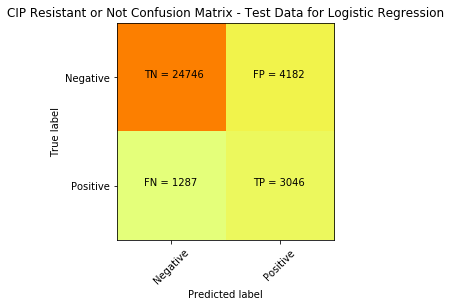

In [307]:
cm = confusion_matrix(lr.predict(X_test), y_test)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('CIP Resistant or Not Confusion Matrix - Test Data for Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [265]:
accuracy_score(y_test, rf.predict(X_test))

0.770566668810703

In [266]:
f1_score(y_test, rf.predict(X_test))

0.36383092562867847

In [267]:
roc_auc_score(y_test, rf.predict(X_test))

0.6017234123009031

In [269]:
confusion_matrix(y_test, rf.predict(X_test))

array([[21920,  1256],
       [ 5878,  2040]], dtype=int64)